In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import scipy, scipy.io
from mpl_toolkits.mplot3d import Axes3D
from scipy import ndimage
from irispy.utils import lcon_to_vert
from irispy.terrain import TerrainSegmentation, terrain_body_obs
from irispy.iris import inflate_region, lownerjohn_inner
from irispy.cspace import cspace3
import irispy.mosek_ellipsoid.lownerjohn_ellipsoid; reload(irispy.mosek_ellipsoid.lownerjohn_ellipsoid)

<module 'irispy.mosek_ellipsoid.lownerjohn_ellipsoid' from 'irispy/mosek_ellipsoid/lownerjohn_ellipsoid.pyc'>

In [6]:
height_data = scipy.io.loadmat('/home/rdeits/drc/software/control/matlab/planners/footstep_planner/test/example_heights.mat')
heights = height_data['heights']
heights[np.isnan(heights)] = 0
px2world = height_data['px2world']

In [7]:
ts = TerrainSegmentation()
ts.setHeights(heights, px2world)

In [20]:
start = np.array([0.6,-0.6,0,0,0, -np.pi/2])
# %lprun -f irispy.mosek_ellipsoid.lownerjohn_ellipsoid.lownerjohn_inner region = ts.findSafeRegion(start)
%lprun -f irispy.terrain.TerrainSegmentation.getCObs region = ts.findSafeRegion(start, iter_limit=2)

iter limit reached



In [21]:
%lprun -f irispy.iris.inflate_region region = ts.findSafeRegion(start, iter_limit=2)

iter limit reached



In [22]:
%lprun -f irispy.hyperplanes.compute_obstacle_planes region = ts.findSafeRegion(start, iter_limit=2)

iter limit reached



In [24]:
%lprun -f irispy.mosek_ellipsoid.lownerjohn_ellipsoid.lownerjohn_inner region = ts.findSafeRegion(start, iter_limit=2)

iter limit reached



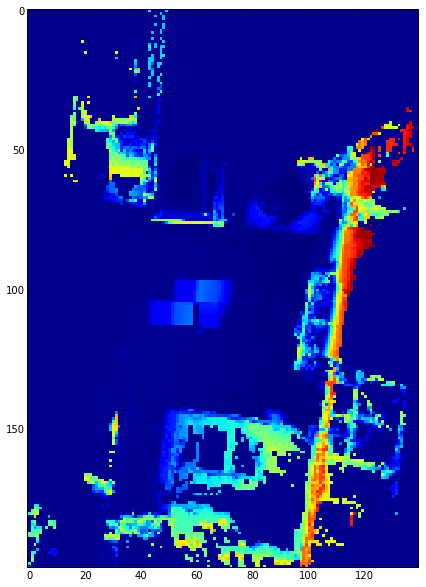

In [8]:
figure(figsize=(10,10))
imshow(ts.heights, interpolation='nearest')

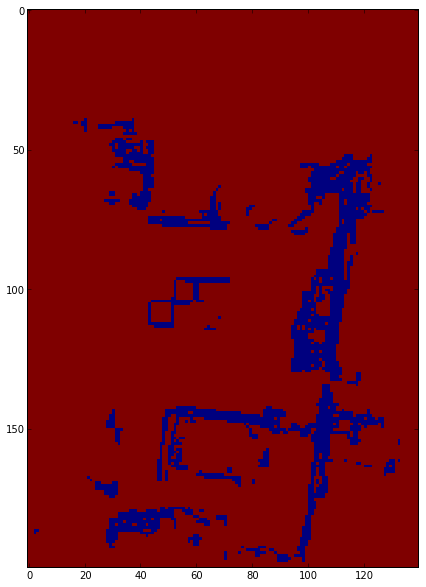

In [8]:
figure(figsize=(10,10))
imshow(ts.feas, interpolation='nearest')

A array([[  9.78249665e-01,   2.07427847e-01,   1.13229920e-03],
       [ -6.00340282e-01,  -7.99743393e-01,   1.43222059e-03],
       [ -5.41609499e-01,  -8.33137897e-01,  -1.11983907e-01],
       [  9.87433861e-01,   7.51711893e-11,   1.58032811e-01],
       [  9.89636249e-01,   4.43291464e-11,  -1.43596985e-01],
       [ -1.00000000e+00,  -0.00000000e+00,  -0.00000000e+00],
       [ -0.00000000e+00,  -1.00000000e+00,  -0.00000000e+00],
       [ -0.00000000e+00,  -0.00000000e+00,  -1.00000000e+00],
       [  1.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   1.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   1.00000000e+00]])
b array([ 0.77012436,  0.32647289,  0.75017936,  1.07816449,  1.58117429,
       -0.1       ,  1.1       ,  4.71238898,  1.1       , -0.1       ,
        1.57079633])


(-5.0, 4.0, -6.0, 2.0)

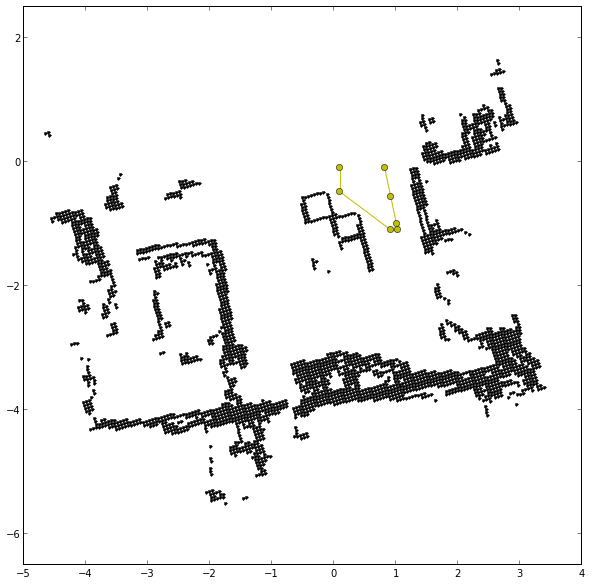

In [9]:
f = figure(figsize=(10,10))
ax = f.add_subplot(111)
ax.plot(ts.edge_pts_xy[0,:,:], ts.edge_pts_xy[1,:,:], 'k.')
V = lcon_to_vert(region.A, region.b)
hull = scipy.spatial.ConvexHull(V[:2,:].T)
ax.plot(V[0,hull.vertices], V[1,hull.vertices], 'yo-')
axis('equal')

In [10]:
b = np.array([1,2,3])

In [11]:
b[0]

1

In [12]:
np.sum([1,2,3])

6